In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Text(0, 0.5, 'CO2_EMISSIONS')

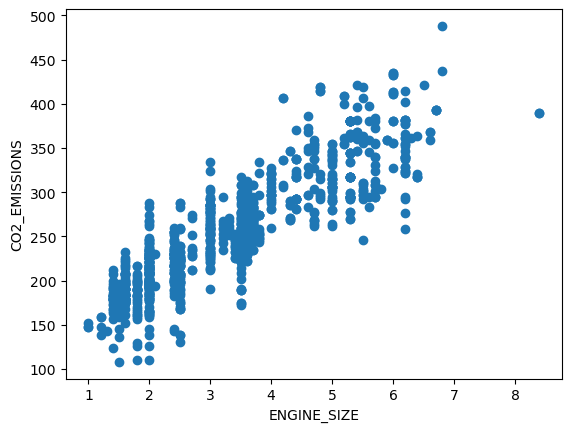

In [9]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'])
plt.xlabel('ENGINE_SIZE')
plt.ylabel("CO2_EMISSIONS")

In [10]:
X=cdf.iloc[:,0:1]
Y=cdf.iloc[:,-1]

In [11]:
X

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [13]:
Y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
X_test

,ENGINESIZE
455,5.3
954,2.5
738,5.5
913,3.0
702,1.5
...,...
311,3.6
848,3.5
508,3.3
330,3.6


In [19]:
Y_test

455    292
954    288
738    301
913    286
702    170
      ... 
311    235
848    251
508    258
330    276
476    354
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [32]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([332.21102776])

Text(0, 0.5, 'CO2_EMISSIONS')

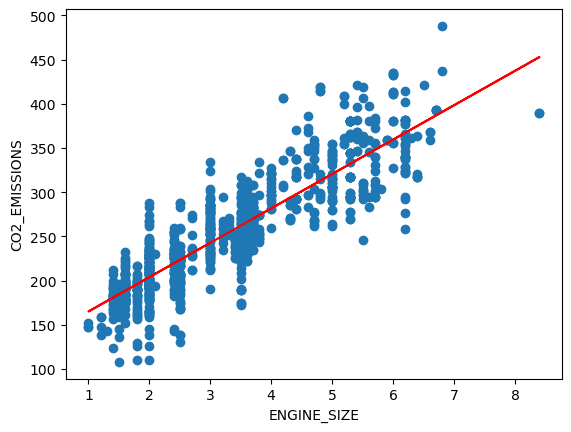

In [26]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('ENGINE_SIZE')
plt.ylabel("CO2_EMISSIONS")

In [29]:
m=lr.coef_    #slope
m


array([38.88026675])

In [30]:
b=lr.intercept_  #intercept
b

126.14561396553256

In [31]:
m*5.3+b

array([332.21102776])